In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/Fall Detection_UP Fall Dataset/CompleteDataSet.csv", low_memory= False)

In [5]:
dataset.shape

(294679, 47)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294679 entries, 0 to 294678
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TimeStamps                  294678 non-null  object 
 1   AnkleAccelerometer          294679 non-null  object 
 2   Unnamed: 2                  294679 non-null  object 
 3   Unnamed: 3                  294679 non-null  object 
 4   AnkleAngularVelocity        294679 non-null  object 
 5   Unnamed: 5                  294679 non-null  object 
 6   Unnamed: 6                  294679 non-null  object 
 7   AnkleLuminosity             294679 non-null  object 
 8   RightPocketAccelerometer    258570 non-null  object 
 9   Unnamed: 9                  258570 non-null  object 
 10  Unnamed: 10                 258570 non-null  object 
 11  RightPocketAngularVelocity  258570 non-null  object 
 12  Unnamed: 12                 258570 non-null  object 
 13  Unnamed: 13   

In [7]:
dataset['Activity'].value_counts()

6.0     54568
7.0     54032
8.0     53689
11.0    50872
10.0    26694
4.0      9248
3.0      9237
1.0      9204
2.0      9188
5.0      9074
9.0      8872
Name: Activity, dtype: int64

In [39]:
exp=pd. read_csv("/content/drive/MyDrive/Fall Detection_UP Fall Dataset/DataSet.csv", usecols=['x-axis (g)','y-axis (g)','z-axis (g)','Activity'])
print(exp)

        x-axis (g)  y-axis (g)  z-axis (g)  Activity
0           -1.005       0.229      -0.083         1
1           -1.005       0.228      -0.082         1
2           -1.005       0.231      -0.079         1
3           -1.005       0.231      -0.079         1
4           -1.008       0.229      -0.072         1
...            ...         ...         ...       ...
294673       0.247       0.948       0.120        11
294674       0.247       0.952       0.121        11
294675       0.246       0.952       0.115        11
294676       0.249       0.949       0.120        11
294677       0.249       0.949       0.120        11

[294678 rows x 4 columns]


In [40]:
exp['x-axis (g)'] = exp['x-axis (g)'].astype('float')
exp['y-axis (g)'] = exp['y-axis (g)'].astype('float')
exp['z-axis (g)'] = exp['z-axis (g)'].astype('float')


In [41]:
exp.shape

(294678, 4)

In [42]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x-axis (g)  294678 non-null  float64
 1   y-axis (g)  294678 non-null  float64
 2   z-axis (g)  294678 non-null  float64
 3   Activity    294678 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 9.0 MB


In [43]:
exp.head()

,x-axis (g),y-axis (g),z-axis (g),Activity
0,-1.005,0.229,-0.083,1
1,-1.005,0.228,-0.082,1
2,-1.005,0.231,-0.079,1
3,-1.005,0.231,-0.079,1
4,-1.008,0.229,-0.072,1


In [49]:
exp['Activity'].value_counts()


6     54568
7     54032
8     53689
11    50872
10    26694
4      9248
3      9237
1      9204
2      9188
5      9074
9      8872
Name: Activity, dtype: int64

In [ ]:
activities = exp['Activity'].value_counts().index
activities

In [56]:
Walking = exp[exp['Activity']== 6].head(8872).copy()
Standing = exp[exp['Activity']== 7].head(8872).copy()
Sitting = exp[exp['Activity']== 8].head(8872).copy()
Laying = exp[exp['Activity']== 11].head(8872).copy()
Jumping = exp[exp['Activity']== 10].head(8872).copy()
Falling_Sideways= exp[exp['Activity']== 4].head(8872).copy()
Falling_Backwards= exp[exp['Activity']== 3].head(8872).copy()
Falling_Forward_Using_Hands= exp[exp['Activity']== 1].head(8872).copy()
Falling_Forward_Using_Knees = exp[exp['Activity']== 2].head(8872).copy()
Falling_Sitting_in_Empty_Chair = exp[exp['Activity']== 5].head(8872).copy()
Picking_Up_an_Object= exp[exp['Activity']== 9].copy()

In [57]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Falling_Forward_Using_Hands,Falling_Forward_Using_Knees,Falling_Backwards,Falling_Sideways,Falling_Sitting_in_Empty_Chair,Walking,Standing,Sitting,Picking_Up_an_Object,Jumping,Laying])
balanced_data.shape

(97592, 4)

In [58]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97592 entries, 0 to 52214
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x-axis (g)  97592 non-null  float64
 1   y-axis (g)  97592 non-null  float64
 2   z-axis (g)  97592 non-null  float64
 3   Activity    97592 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.7 MB


In [59]:
balanced_data['Activity'].value_counts()

11    8872
10    8872
9     8872
8     8872
7     8872
6     8872
5     8872
4     8872
3     8872
2     8872
1     8872
Name: Activity, dtype: int64

In [60]:
balanced_data.head()

,x-axis (g),y-axis (g),z-axis (g),Activity
0,-1.005,0.229,-0.083,1
1,-1.005,0.228,-0.082,1
2,-1.005,0.231,-0.079,1
3,-1.005,0.231,-0.079,1
4,-1.008,0.229,-0.072,1


In [61]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head()

,x-axis (g),y-axis (g),z-axis (g),Activity,label
0,-1.005,0.229,-0.083,1,0
1,-1.005,0.228,-0.082,1,0
2,-1.005,0.231,-0.079,1,0
3,-1.005,0.231,-0.079,1,0
4,-1.008,0.229,-0.072,1,0


In [62]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [63]:
X = balanced_data[['x-axis (g)', 'y-axis (g)', 'z-axis (g)']]
y = balanced_data['label']

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)'])
scaled_X['label'] = y.values

scaled_X

,x-axis (g),y-axis (g),z-axis (g),label
0,-0.774863,0.240600,0.174372,0
1,-0.774863,0.238900,0.176561,0
2,-0.774863,0.243999,0.183125,0
3,-0.774863,0.243999,0.183125,0
4,-0.779578,0.240600,0.198443,0
...,...,...,...,...
97587,0.646043,-0.675589,-1.722874,10
97588,0.646043,-0.675589,-1.722874,10
97589,0.644471,-0.680688,-1.720686,10
97590,0.649187,-0.682388,-1.714121,10


In [65]:
import scipy.stats as stats
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [70]:
def get_frames(exp, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(exp) - frame_size, hop_size):
        x = exp['x-axis (g)'].values[i: i + frame_size]
        y = exp['y-axis (g)'].values[i: i + frame_size]
        z = exp['z-axis (g)'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(exp['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [71]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [72]:
X.shape, y.shape

((2438, 80, 3), (2438,))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [78]:
X_train.shape, X_test.shape

((1706, 80, 3), (732, 80, 3))

In [79]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [80]:
X_train = X_train.reshape(1706, 80, 3, 1)
X_test = X_test.reshape(732, 80, 3, 1)

In [81]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [85]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='softmax')) #Here 11 represents the number of labels

In [86]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [87]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
54/54 [==============================] - 2s 21ms/step - loss: 2.1518 - accuracy: 0.2159 - val_loss: 1.4606 - val_accuracy: 0.5246
Epoch 2/10
54/54 [==============================] - 1s 18ms/step - loss: 1.5213 - accuracy: 0.4174 - val_loss: 1.1773 - val_accuracy: 0.6202
Epoch 3/10
54/54 [==============================] - 1s 18ms/step - loss: 1.3056 - accuracy: 0.5167 - val_loss: 1.0604 - val_accuracy: 0.6243
Epoch 4/10
54/54 [==============================] - 1s 19ms/step - loss: 1.1367 - accuracy: 0.5781 - val_loss: 0.9929 - val_accuracy: 0.6516
Epoch 5/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0811 - accuracy: 0.5887 - val_loss: 0.9607 - val_accuracy: 0.6544
Epoch 6/10
54/54 [==============================] - 1s 19ms/step - loss: 0.9693 - accuracy: 0.6468 - val_loss: 0.9146 - val_accuracy: 0.6708
Epoch 7/10
54/54 [==============================] - 1s 19ms/step - loss: 0.9821 - accuracy: 0.6255 - val_loss: 0.8950 - val_accuracy: 0.6612
Epoch 8/10
54

In [89]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

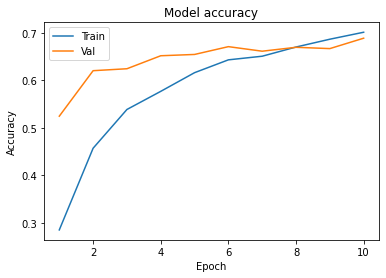

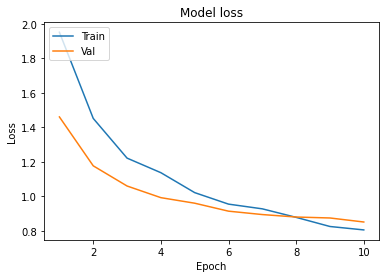

In [90]:
plot_learningCurve(history, 10)

In [91]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [92]:
y_pred= np.argmax(model.predict(X_test), axis=-1)

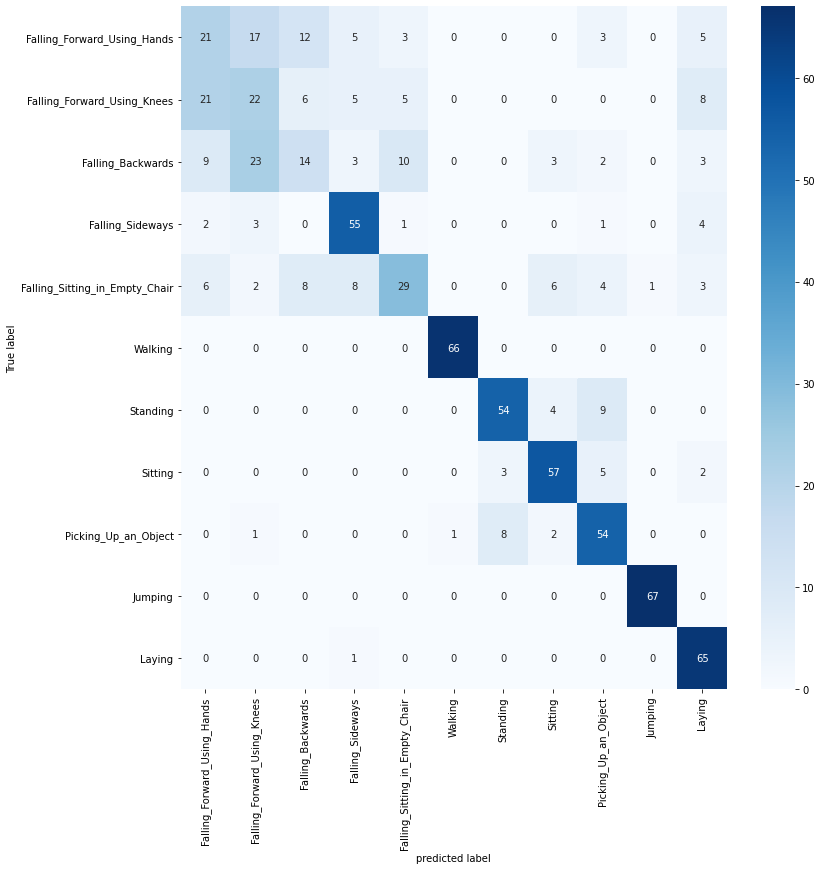

In [96]:
cm = tf.math.confusion_matrix(y_test, y_pred)
axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
figure = plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()
